## Chirp 2.

We construct chirp data with some gaussian noise.

We want to fit a smooth model to the data: SplinesDynamicModel with unknown knot number and locations.


In [1]:
import numpy as numpy
import math

from astropy.io import ascii

from BayesicFitting import ModelDistribution
from BayesicFitting import EvidenceProblem
from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt

from BayesicFitting import SplinesDynamicModel

In [2]:
#%matplotlib osx
%matplotlib inline

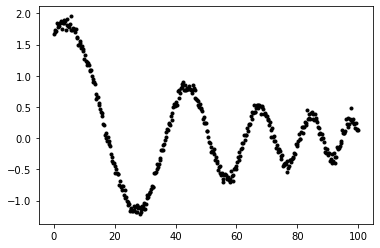

In [3]:
npt = 401
t = numpy.linspace( 0, 100, npt, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * numpy.exp( t / 60 ) +1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( npt ) * 0.05
plt.plot( t, y, 'k.' )
plt.show()

In [4]:
knots =[0, 100]
mxk = 15
mdl = SplinesDynamicModel( knots=knots, dynamic=True, maxKnots=mxk, minKnots=4, minDistance=0.03 )
mdl.setLimits( lowLimits=[-10.0], highLimits=[+10.0] )

ep = EvidenceProblem( model=mdl, xdata=t, ydata=y )

Fit all parameters of
  DynModBasicSplines of order 3 with 8 knots.
Using a ModelDistribution with unknown scale
Moving the walkers with   BirthEngine  DeathEngine  StructureEngine
Iteration     logZ        H       LowL     npar parameters                                   scale
       0      -32.5      8.1      -24.4     12  [    1.416    3.416   -3.539    1.058 ...    0.229]
     100       65.6      5.7       71.6     12  [    1.384    3.506   -3.679    2.137 ...    0.178]
     200       176.      7.2       184.     14  [    1.710    2.132    1.246   -1.068 ...    0.131]
     300       256.      7.0       264.     15  [    1.695    2.101    1.195   -1.870 ...    0.105]
     400       325.      7.5       333.     13  [    1.662    1.989    1.592   -2.952 ...    0.090]
     500       376.      8.2       387.     15  [    1.628    2.921   -1.475   -1.033 ...    0.077]
     600       421.      8.8       431.     14  [    1.723    1.753    2.414   -2.148 ...    0.069]
     700       447. 

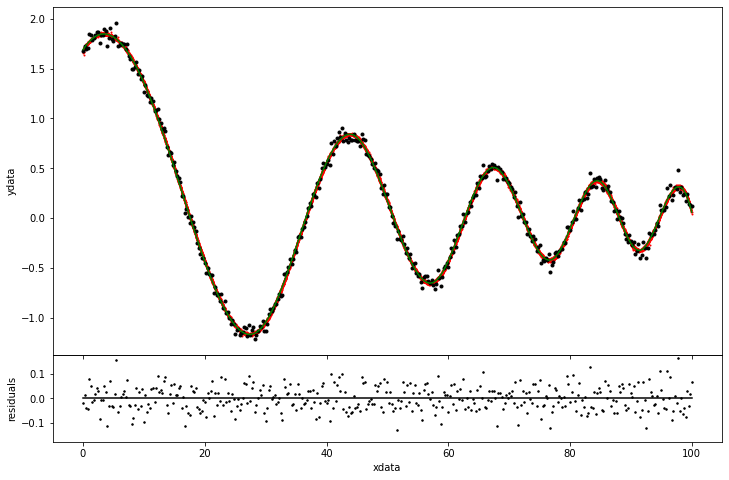

In [6]:
distr = ModelDistribution( limits=[0.01,1] )

ns = NestedSampler( problem=ep, distribution=distr )

ns.verbose = 2

evid = ns.sample( plot=True )



In [7]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.knots, max=None ) )
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.knots, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    0.000    9.290   28.776   44.358   57.547   68.182   76.718   84.817   91.326  100.000]
[    1.703    1.956    1.639   -3.142    2.494   -1.966    1.533   -1.312    1.137   -1.195    0.813    0.058]
[    0.000   11.842   28.711   44.368   57.730   67.493   76.874   84.803   91.428  100.000]
[    1.692    2.067    1.249   -2.867    2.534   -1.938    1.521   -1.314    1.106   -1.185    0.810    0.057]


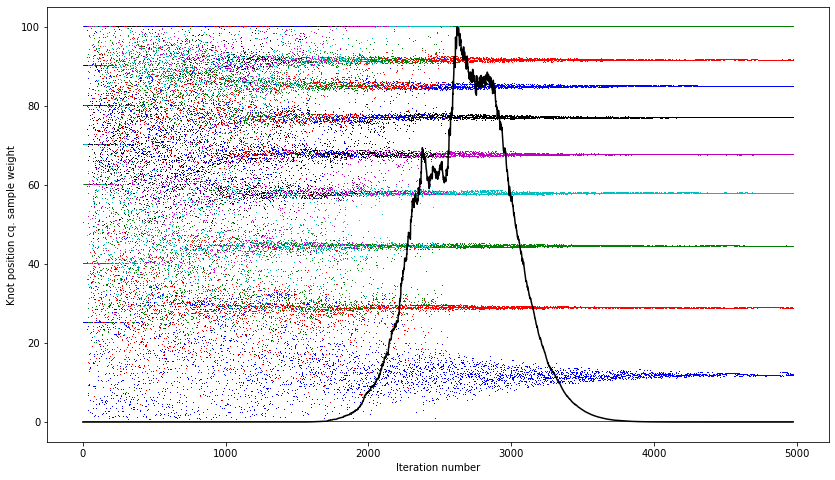

In [8]:
## Plot the evolutie of knots and sample weights
cc = ['k,', 'b,', 'r,', 'g,', 'c,', 'm,']
sl = ns.samples
ka = numpy.zeros( ( mxk, len( sl ) ), dtype=float )
plt.figure( 1, figsize=[14,8] )
for k,s in enumerate( sl ) :
    n = len( s.model.knots )
    ka[:n,k] = s.model.knots
for j in range( mxk ) :
    plt.plot( ka[j,:], cc[j%6] )
wgts = sl.getWeightEvolution()
mw = max( wgts )
plt.plot( 100 * wgts / mw, 'k-' )
plt.xlabel( "Iteration number" )
plt.ylabel( "Knot position cq. sample weight")
plt.show()

